# 환경설정 보충

https://gist.github.com/allieus/b7ea5797459b47c91589c4253ad2b2b9



폰트의 종류

+ 고정폭 폰트 : Tahoma, D2Coding 등
+ 가변폭 폰트

# data

아래 구조가 되도록, 압축을 풀어주세요.

+ `"c:\Users\계정명\data\titanic\train.csv"`
+ `"c:\Users\계정명\data\titanic\test.csv"`

# 3일차

## titanic 맛보기

In [1]:
import pandas as pd

train_df = pd.read_csv('data/titanic/train.csv', index_col='PassengerId')
print(train_df.shape)
train_df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test_df = pd.read_csv('data/titanic/test.csv', index_col='PassengerId')
print(test_df.shape)
test_df.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_df.Survived.mean()  # 전체 생존율

0.3838383838383838

In [4]:
mask = train_df.Sex == 'male'
train_df.loc[mask].Survived.mean()

0.18890814558058924

In [5]:
mask = train_df.Sex == 'female'
train_df.loc[mask].Survived.mean()

0.7420382165605095

In [11]:
mask = test_df.Sex == 'male'
test_df.loc[mask, 'Survived'] = 0

mask = test_df.Sex == 'female'
test_df.loc[mask, 'Survived'] = 1

In [20]:
test_df.Survived = test_df.Survived.astype(int)  # 정수타입으로 변환

In [21]:
test_df[['Sex', 'Survived']].head()

,Sex,Survived
PassengerId,,
892,male,0
893,female,1
894,male,0
895,male,0
896,female,1


In [22]:
test_df[['Survived']].to_csv('data/titanic/submition.csv')

## 빌트인 함수

### sorted

In [23]:
import random

number_list = random.sample(range(1, 100), 6)
number_list

[4, 72, 68, 12, 9, 56]

In [24]:
sorted(number_list)

[4, 9, 12, 56, 68, 72]

In [25]:
sorted(number_list, reverse=True)

[72, 68, 56, 12, 9, 4]

In [26]:
def sorted_fn(value):
    return value % 10

sorted(number_list, key=sorted_fn)

[72, 12, 4, 56, 68, 9]

In [27]:
sorted(number_list, key=lambda value: value % 10)

[72, 12, 4, 56, 68, 9]

In [30]:
import pandas as pd

df = pd.read_csv("https://gist.githubusercontent.com/allieus/c1009fbf0e12df3bcd95269422f17a19/raw/0aacdeb6a372aba4664f087e7450779990224e59/%25EC%2597%2591%25EC%2585%2580_%25EB%25A9%259C%25EB%25A1%25A0%25EC%25B0%25A8%25ED%258A%25B8_top100.csv")  # SSL Error

data = df.to_dict()
columns = data.keys()
song_list = [
    {column: data[column][idx] for column in columns}
    for idx in range(100)]

len(song_list)

100

In [31]:
song_list[0]

{'곡일련번호': 31346009,
 '순위': 1,
 '앨범': '삐삐',
 '곡명': '삐삐',
 '가수': '아이유',
 '커버이미지_주소': 'https://cdnimg.melon.co.kr/cm/album/images/102/10/535/10210535_500.jpg/melon/resize/120/quality/80/optimize',
 '좋아요': 61528}

In [32]:
sorted(song_list)

TypeError: '<' not supported between instances of 'dict' and 'dict'

In [44]:
def sorted_fn(song):
    return song['좋아요']

for song in sorted(song_list, key=sorted_fn, reverse=True)[:10]:
    # print(song['곡명'], song['가수'], song['좋아요'])
    # print('{} {} {}'.format(song['곡명'], song['가수'], song['좋아요']))
    # print('{곡명} {가수} {좋아요}'.format(
    #    곡명=song['곡명'],
    #    가수=song['가수'],
    #    좋아요=song['좋아요']))
    print('{곡명} - {가수} ({좋아요})'.format(**song))  # unpacking

봄날 - 방탄소년단 (359130)
DNA - 방탄소년단 (323911)
밤편지 - 아이유 (283167)
에너제틱 (Energetic) - Wanna One (워너원) (268394)
사랑을 했다 (LOVE SCENARIO) - iKON (267692)
선물 - 멜로망스 (266869)
FAKE LOVE - 방탄소년단 (253847)
Way Back Home - 숀 (SHAUN) (225308)
Beautiful - Wanna One (워너원) (216065)
그날처럼 - 장덕철 (208427)


In [50]:
for song in song_list:
    if song['좋아요'] > 200_000:
        print(song['곡명'])

FAKE LOVE
Way Back Home
봄날
DNA
에너제틱 (Energetic)
사랑을 했다 (LOVE SCENARIO)
Beautiful
밤편지
그날처럼
그리워하다
선물


In [61]:
def filter_fn(song):
    # return song['좋아요'] > 200_000
    # return 2000 <= song['좋아요'] and song['좋아요'] < 30000
    return 2000 <= song['좋아요'] < 30000

for song in filter(filter_fn, song_list):
    print(song['곡명'])

사임사임 (Feat. CHANGMO)
가을 타나 봐
나
이별하러 가는 길
Not A Love
공상과학기술 (Feat. 기리보이, 스윙스)
패 (Feat. 넉살, 딥플로우)
AND I
I Don’t Care (with 스푼즈)
잘 지내요
Perfect
Signal
ylenoL
중력달 (Gravity&Moon;)


In [66]:
song = song_list[0]
str(song['좋아요'] // 1000) + '만'

'61만'

In [69]:
def map_fn(song):
    return str(song['좋아요'] // 1000) + '만'

for 만 in map(map_fn, song_list):
    print(만)

61만
48만
54만
97만
173만
55만
27만
132만
95만
253만
28만
129만
77만
108만
176만
101만
98만
185만
91만
88만
91만
83만
115만
225만
138만
359만
323만
127만
155만
53만
72만
110만
46만
30만
192만
178만
127만
26만
112만
130만
268만
267만
25만
124만
216만
190만
104만
94만
176만
115만
66만
156만
109만
132만
2만
81만
78만
88만
283만
113만
64만
75만
208만
83만
203만
81만
137만
62만
13만
119만
69만
154만
53만
141만
10만
48만
119만
266만
33만
76만
20만
13만
32만
130만
67만
126만
25만
88만
24만
156만
92만
121만
125만
61만
27만
145만
26만
42만
26만
81만


In [71]:
def filter_fn(song):
    return song['좋아요'] > 200_000

def map_fn(song):
    return str(song['좋아요'] // 1000) + '만'

obj = filter(filter_fn, song_list)
obj = map(map_fn, obj)

for 만 in obj:
    print(만)

253만
225만
359만
323만
268만
267만
216만
283만
208만
203만
266만


In [ ]:
lines = open('정말_큰_데이터_1GB.csv').read()
for line in lines.splitlines():
    print(line)

In [ ]:
for line in open('정말_큰_데이터_1GB.csv'):
    print(line)

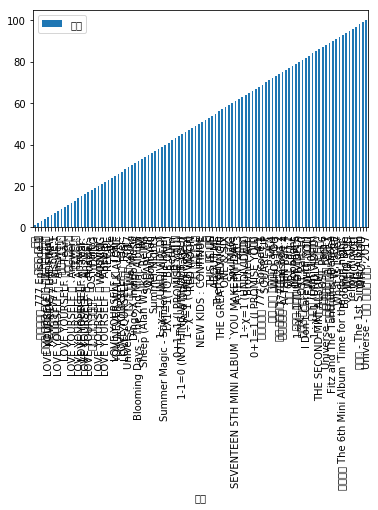

In [81]:
%matplotlib inline

df = pd.DataFrame(song_list)
df[['순위', '앨범']].sort_values('순위').set_index('앨범').plot.bar()